In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy

f = open('./benchmark_data/quantum_plotter_input_ibmq_boeblingen_saturated.p', 'rb' )
plotter_inputs = []
while 1:
    try:
        plotter_inputs.append(pickle.load(f))
    except EOFError:
        break

Error: Error: Jupyter cannot be started. Error attempting to locate jupyter: Error: Module 'notebook' not installed.

In [6]:
repetition_idx = 1
case = (5,14)
plotter_input = plotter_inputs[repetition_idx][case]
print(plotter_input.keys())
circ = plotter_input['circ']
d1 = plotter_input['evaluations']['sv_noiseless']
d2 = plotter_input['evaluations']['qasm']
d3 = plotter_input['evaluations']['qasm+noise']
d4 = plotter_input['evaluations']['qasm+noise+cutting']
ground_truth = cross_entropy(target=d1,obs=d1)
qasm = cross_entropy(target=d1,obs=d2)
qasm_noise = cross_entropy(target=d1,obs=d3)
qasm_noise_cutting = cross_entropy(target=d1,obs=d4)

percent_change = 100*(qasm_noise - qasm_noise_cutting)/(qasm_noise - ground_truth)
# print(circ)
print(percent_change)

dict_keys(['num_shots', 'circ', 'clusters', 'evaluations', 'searcher_time', 'classical_time', 'quantum_time', 'uniter_time'])
63.080064822906095


[0.0011396054036684272, 0.0011396054036684282]
0.0022792108073368556 0.002514982876712329 0.001071506076388889 0.0011313872960686145


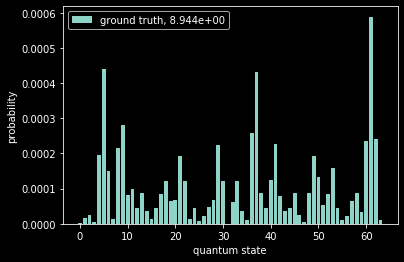

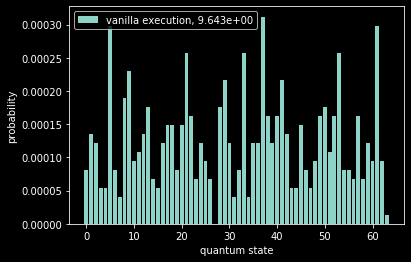

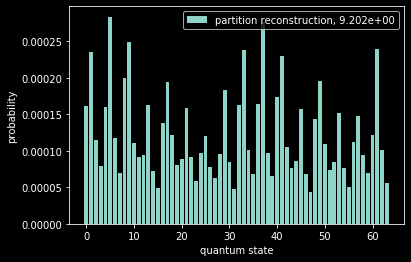

In [7]:
plot_range = min(64,len(d1))
x = np.arange(len(d1))[:plot_range]

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('ground_truth_eg.png',dpi=400,transparent=True)

plt.figure()
plt.bar(x,height=d3[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d3))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('vanilla_execution_eg.png',dpi=400,transparent=True)

plt.figure()
plt.bar(x,height=d4[:plot_range],label='partition reconstruction, %.3e'%cross_entropy(d1,d4))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('partition_reconstruction_eg.png',dpi=400,transparent=True)

d1.sort()
d2.sort()
d3.sort()
d4.sort()
print(d1[-2:])
print(sum(d1[-2:]),sum(d2[-2:]),sum(d3[-2:]),sum(d4[-2:]))